In [1]:
import numpy as np
import pyogrio
import geopandas as gpd
from tqdm import tqdm
import matplotlib.pyplot as plt

insar_data_path = "C:/Users/eleonore.kong/Documents/InSAR/DATA/grid_stats_agg_lpf.gpkg"
layer = 'grid_500m'
output = "C:/Users/eleonore.kong/Documents/InSAR/DATA/"

In [2]:
gdf = pyogrio.read_dataframe(insar_data_path, layer=layer)
# columns_to_keep = [column for column in gdf.columns if 'Max' not in column]
# columns_to_keep = [column for column in columns_to_keep if 'Min' not in column]
# columns_to_keep = [column for column in columns_to_keep if 'Mean' not in column]
# gdf = gdf[columns_to_keep]

In [3]:
link = pyogrio.read_dataframe("C:/Users/eleonore.kong/Documents/InSAR/DATA/tables_link.gpkg", layer='grid_rga_swi_link')
link = link.drop('geometry', axis=1)
gdf = gdf.merge(link, on=layer)
gdf

,grid_500m,summer_2016_median,summer_2016_p75,summer_2017_median,summer_2017_p75,summer_2018_median,summer_2018_p75,summer_2019_median,summer_2019_p75,summer_2020_median,...,summer_min_swi_2019,summer_min_swi_2020,summer_min_swi_2021,winter_summer_swi_diff,winter_summer_swi_diff_2016,winter_summer_swi_diff_2017,winter_summer_swi_diff_2018,winter_summer_swi_diff_2019,winter_summer_swi_diff_2020,winter_summer_swi_diff_2021
0,57380.0,0.003071,0.003823,0.001613,0.001613,0.000855,0.000855,0.004147,0.004147,0.002973,...,0.946,0.945,0.945,0.551,0.444,0.169,0.396,0.333,0.498,0.441
1,59340.0,0.006148,0.006148,0.003672,0.003672,0.005196,0.005196,0.003022,0.003022,0.004512,...,0.946,0.945,0.945,0.551,0.444,0.169,0.396,0.333,0.498,0.441
2,114230.0,0.002483,0.002483,0.001354,0.001354,0.001564,0.001564,NaN,NaN,0.002088,...,0.364,0.366,0.384,1.119,0.988,0.673,0.972,0.908,1.062,1.020
3,114303.0,0.000499,0.000499,0.000393,0.000393,0.001450,0.001450,0.001426,0.001426,0.001019,...,0.340,0.358,0.350,1.077,1.042,0.758,0.982,0.932,1.008,1.023
4,116178.0,0.002408,0.002408,0.002344,0.002344,0.002024,0.002024,0.001440,0.001440,0.002211,...,0.364,0.366,0.384,1.119,0.988,0.673,0.972,0.908,1.062,1.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560295,4435931.0,0.004076,0.004076,0.003022,0.003022,0.002423,0.002423,0.003385,0.003385,0.002748,...,0.188,0.172,0.334,1.062,0.831,0.602,1.075,0.727,0.910,0.818
560296,4435932.0,0.002391,0.002495,0.002013,0.002567,0.001253,0.002328,0.000961,0.001054,0.002492,...,0.188,0.172,0.334,1.062,0.831,0.602,1.075,0.727,0.910,0.818
560297,4439849.0,0.001300,0.001300,0.000631,0.000631,0.001200,0.001200,0.000667,0.000667,0.000660,...,0.188,0.172,0.334,1.062,0.831,0.602,1.075,0.727,0.910,0.818
560298,4443768.0,0.003712,0.003712,0.005897,0.005897,0.006974,0.006974,0.007851,0.007851,0.007810,...,0.188,0.172,0.334,1.062,0.831,0.602,1.075,0.727,0.910,0.818


In [12]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset (You can use any dataset)
# Example using sklearn's Iris dataset

# Create a DataFrame for easy manipulation


# df = gdf[['Detrended Amplitude_median', 'mean_swi', 'winter_max_swi', 'summer_min_swi', 'winter_summer_swi_diff', 'NIVEAU']]
# df = gdf[[col for col in gdf.columns if '2018' in col]]

df = gdf.drop([layer,'geometry', 'NIVEAU'], axis=1)
df.fillna(0, inplace=True)
target = gdf['NIVEAU'].values

In [13]:
# Step 3: Standardize the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 4: Apply PCA
pca = PCA(n_components=5)  # Reducing to 2 components for visualization
pca_result = pca.fit_transform(df_scaled)

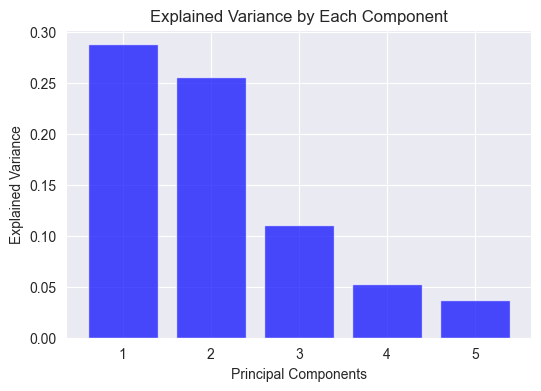

In [14]:
# Step 5: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']) #, 'PC7', 'PC8', 'PC9', 'PC10'
pca_df['Target'] = target

# Step 6: Plot the Explained Variance Ratio
plt.figure(figsize=(6,4))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='blue', alpha=0.7)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Each Component')
plt.show()

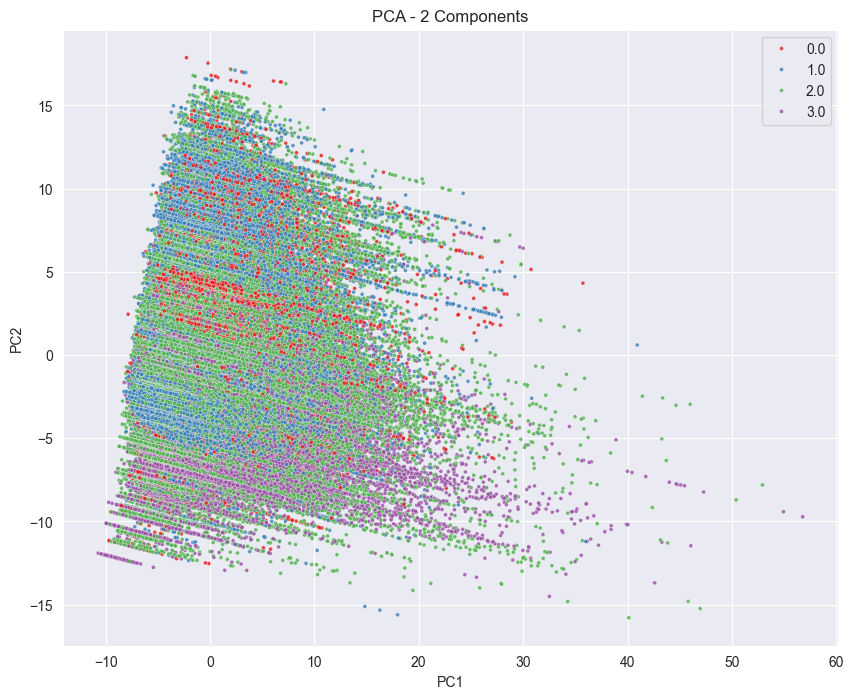

In [15]:
# Step 7: Visualize PCA Result
fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
#                 c=target, cmap='Set1', s=5, alpha=0.8)
sns.scatterplot(x='PC1', y='PC2', hue=target, palette='Set1', data=pca_df, s=8, alpha=0.8) #
# ax.view_init(elev=20, azim=40)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# plt.xlim(-5,10)
# plt.ylim(-6,6)
# plt.zlim(-10,0)
plt.title('PCA - 2 Components')
# fig.colorbar(sc)
plt.show()

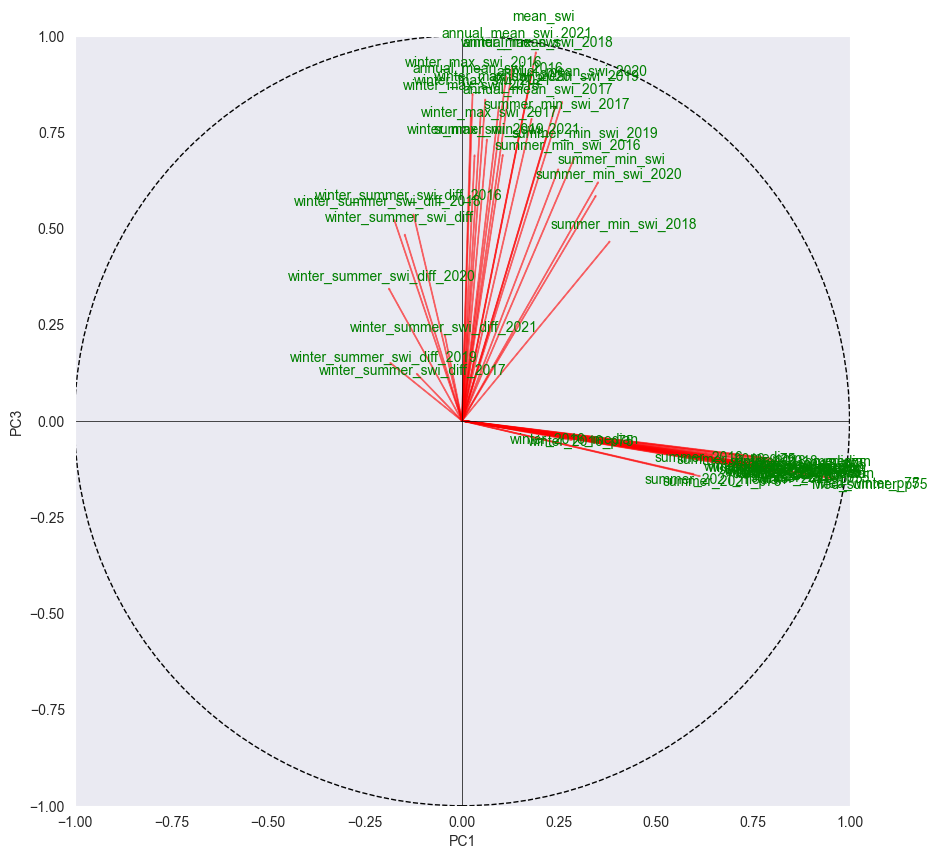

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_scaled is the standardized data, and pca is already fitted
components = pca.components_  # Get PCA components
n_pcs = pca.n_components_  # Number of principal components

# Step 1: Calculate the correlation between original variables and PCs
correlations = components.T * np.sqrt(pca.explained_variance_)

# Step 2: Plot the correlation circle
plt.figure(figsize=(10, 10))

# Plot unit circle
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Add each variable as a vector
for i, (var_name, coord) in enumerate(zip(df.columns, correlations)):
    plt.arrow(0, 0, coord[0], coord[1], color='r', alpha=0.5)
    plt.text(coord[0] * 1.1, coord[1] * 1.1, var_name,  color='g', ha='center', va='center')

# Formatting the plot
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('PC1')
plt.ylabel('PC3')
# plt.title('Variable Correlation Circle (PC5 vs PC6)')
plt.grid()

plt.show()


In [17]:

# Get the explained variance for scaling
explained_variance = np.sqrt(pca.explained_variance_)

# Calculate the correlation of each variable with PC1
correlations_with_pc1 = components[0, :] * explained_variance[0]
correlations_with_pc2 = components[1, :] * explained_variance[1]
correlations_with_pc3 = components[2, :] * explained_variance[2]
correlations_with_pc4 = components[3, :] * explained_variance[3]
correlations_with_pc5 = components[4, :] * explained_variance[4]
# correlations_with_pc6 = components[5, :] * explained_variance[5]

# Create a DataFrame to store the variables and their correlations
correlation_df = pd.DataFrame({
    'Variable': df.columns,
    'Correlation_with_PC1': correlations_with_pc1,
    'Correlation_with_PC2': correlations_with_pc2,
    'Correlation_with_PC3': correlations_with_pc3,
    'Correlation_with_PC4': correlations_with_pc4,
    'Correlation_with_PC5': correlations_with_pc5,
    # 'Correlation_with_PC6': correlations_with_pc6,
    
})

# Sort the DataFrame by the absolute correlation values in descending order
correlation_df['PC1_Abs_Correlation'] = correlation_df['Correlation_with_PC1'].abs()
correlation_df['PC2_Abs_Correlation'] = correlation_df['Correlation_with_PC2'].abs()
correlation_df['PC3_Abs_Correlation'] = correlation_df['Correlation_with_PC3'].abs()
correlation_df['PC4_Abs_Correlation'] = correlation_df['Correlation_with_PC4'].abs()
correlation_df['PC5_Abs_Correlation'] = correlation_df['Correlation_with_PC5'].abs()
# correlation_df['PC6_Abs_Correlation'] = correlation_df['Correlation_with_PC6'].abs()
# correlation_df_sorted = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Display the ranked variables by correlation with PC1
correlation_df

,Variable,Correlation_with_PC1,Correlation_with_PC2,Correlation_with_PC3,Correlation_with_PC4,Correlation_with_PC5,PC1_Abs_Correlation,PC2_Abs_Correlation,PC3_Abs_Correlation,PC4_Abs_Correlation,PC5_Abs_Correlation
0,summer_2016_median,0.618835,-0.087197,-0.051150,0.042319,-0.375605,0.618835,0.087197,0.051150,0.042319,0.375605
1,summer_2016_p75,0.642654,-0.091129,-0.066765,0.056933,-0.380597,0.642654,0.091129,0.066765,0.056933,0.380597
2,summer_2017_median,0.767686,-0.114653,-0.089074,0.012570,-0.120849,0.767686,0.114653,0.089074,0.012570,0.120849
3,summer_2017_p75,0.778300,-0.121696,-0.103283,0.028747,-0.127218,0.778300,0.121696,0.103283,0.028747,0.127218
4,summer_2018_median,0.794445,-0.097464,-0.100257,-0.128715,0.029136,0.794445,0.097464,0.100257,0.128715,0.029136
5,summer_2018_p75,0.809215,-0.103968,-0.116809,-0.113216,0.019116,0.809215,0.103968,0.116809,0.113216,0.019116
6,summer_2019_median,0.801402,-0.125072,-0.100484,-0.097194,0.073637,0.801402,0.125072,0.100484,0.097194,0.073637
7,summer_2019_p75,0.815868,-0.134160,-0.115947,-0.077933,0.062711,0.815868,0.134160,0.115947,0.077933,0.062711
8,summer_2020_median,0.781806,-0.113649,-0.117022,-0.081558,0.201814,0.781806,0.113649,0.117022,0.081558,0.201814
9,summer_2020_p75,0.794667,-0.121934,-0.132689,-0.065100,0.188723,0.794667,0.121934,0.132689,0.065100,0.188723


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Step 1: Calculate the correlation matrix
corr_matrix = df.corr(method='pearson')



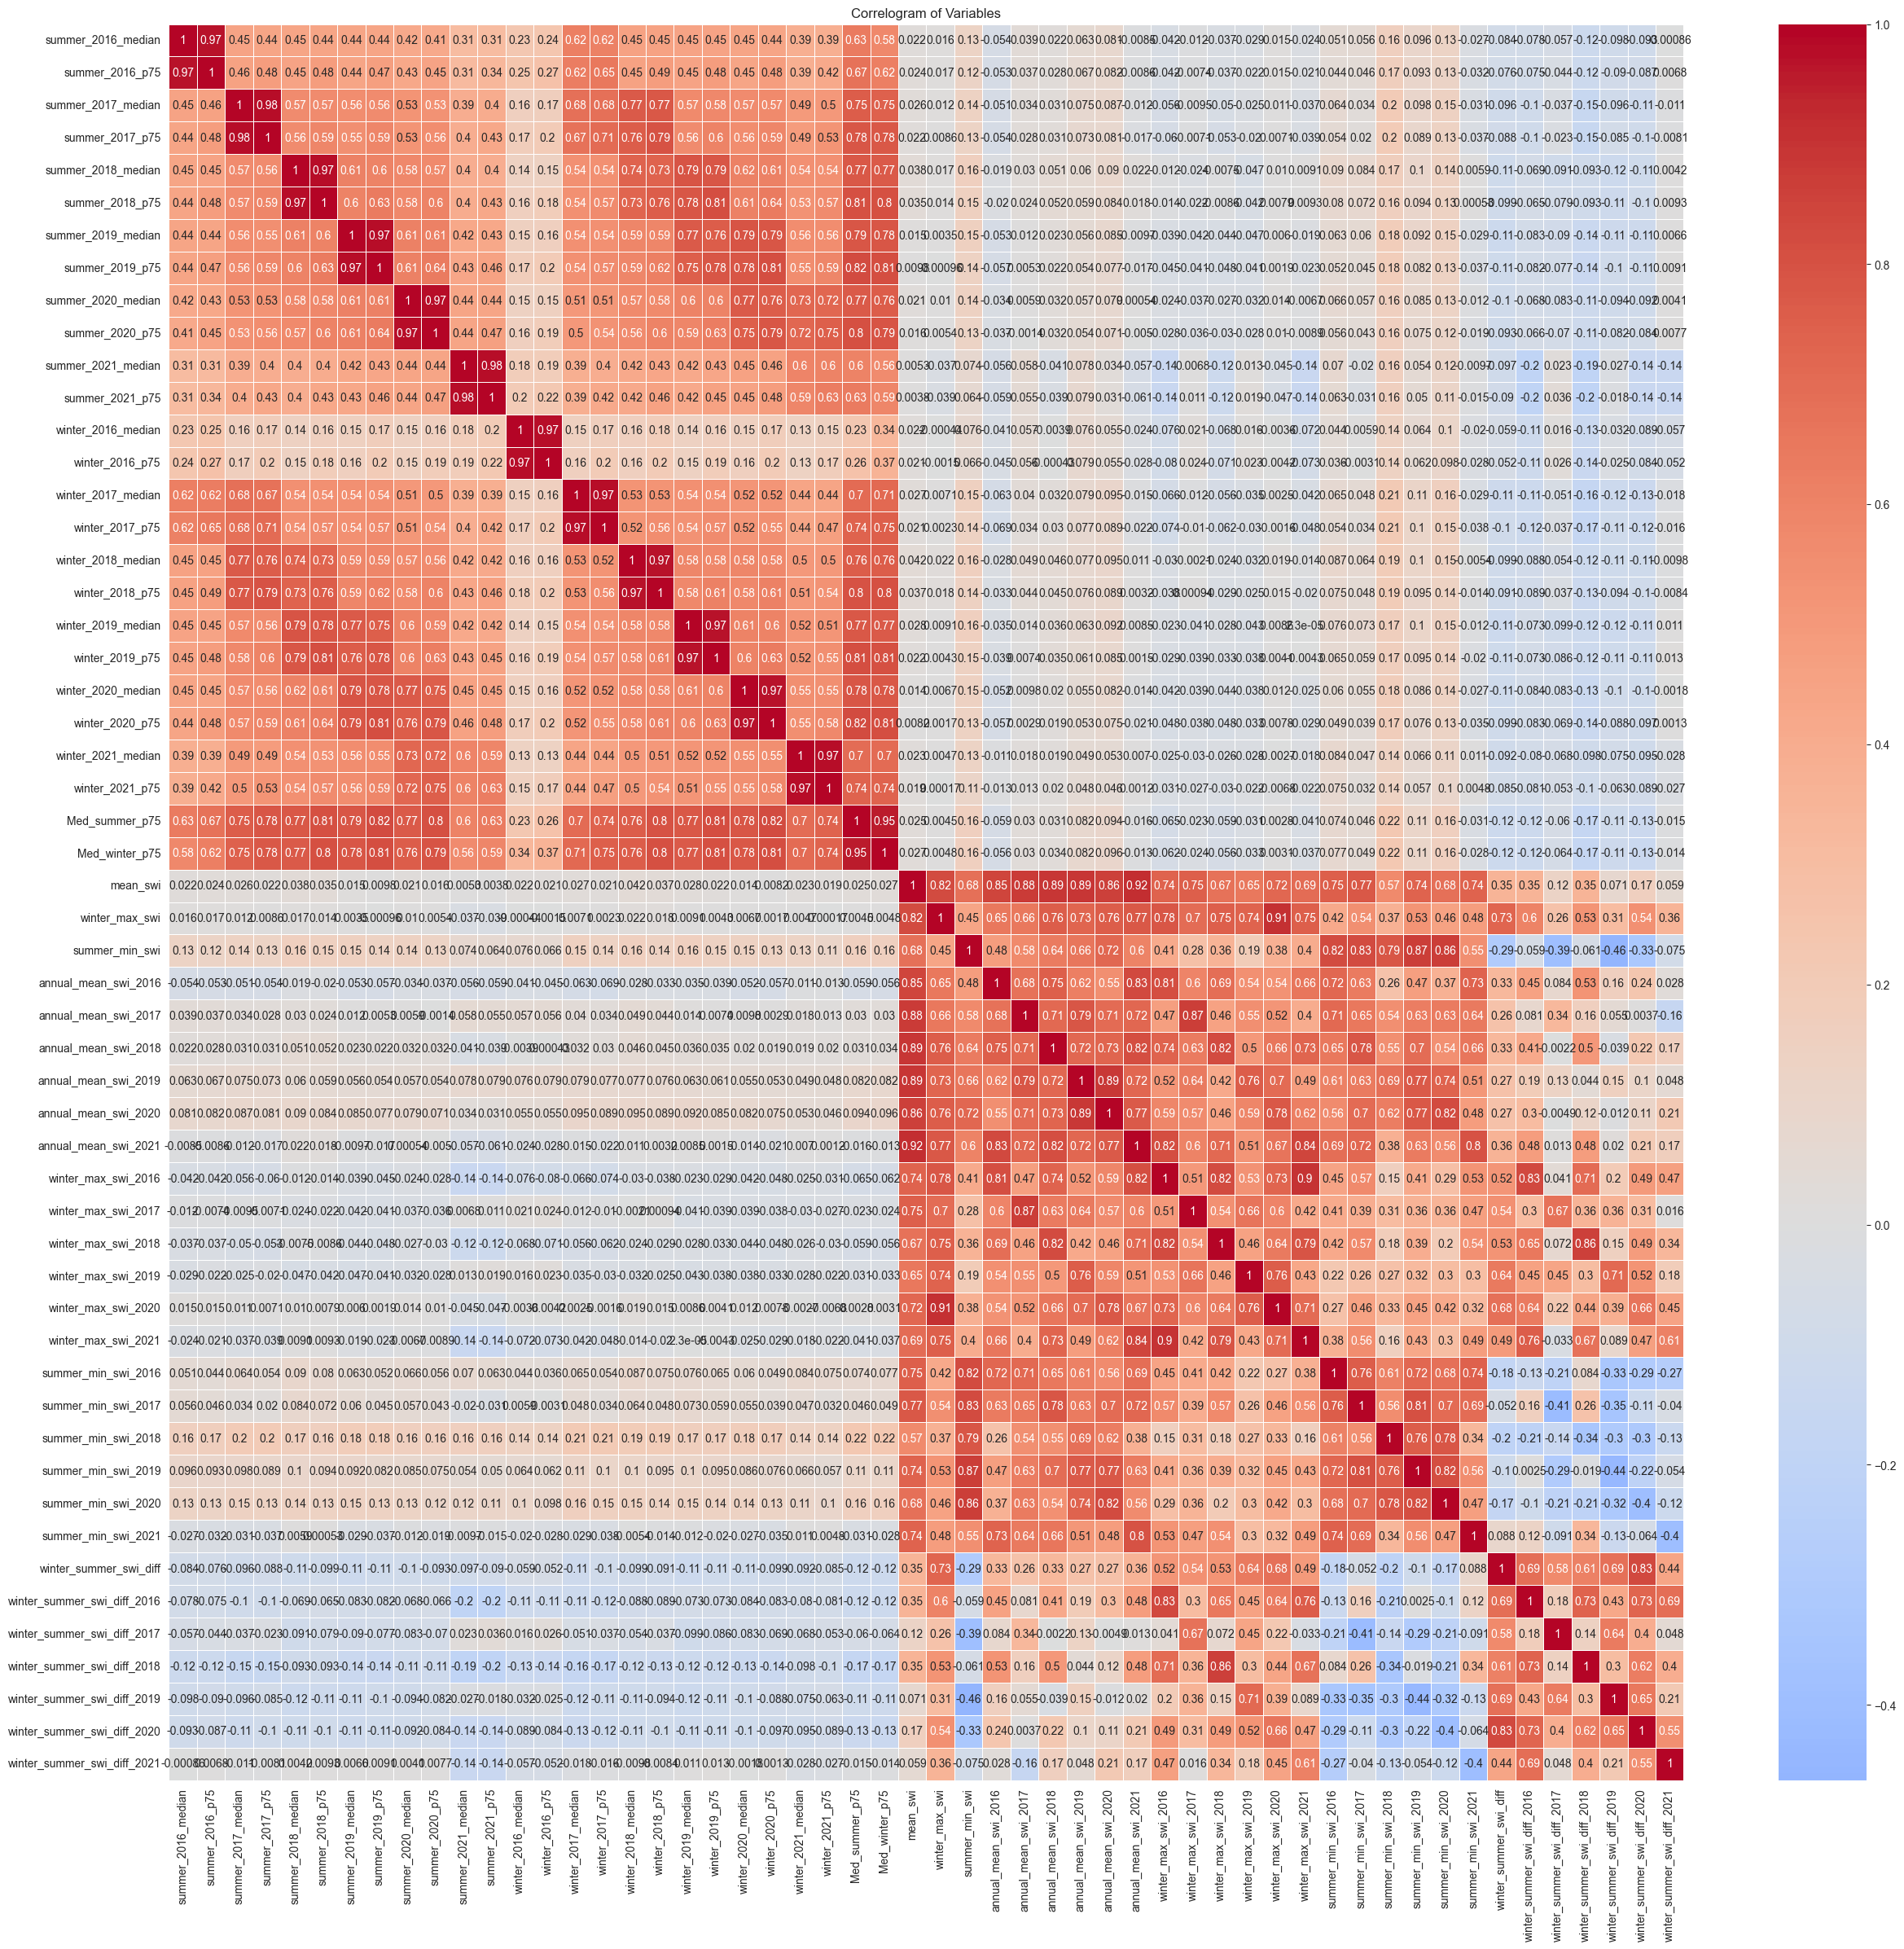

In [19]:
# Step 2: Create a correlogram (heatmap)
plt.figure(figsize=(30, 28))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Step 3: Add plot formatting
plt.title('Correlogram of Variables')
plt.show()